# t-Distributed Stochastic Neighbor Embedding (t-SNE)

#### In simpler terms, t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

#### However, after this process, the input features are no longer identifiable, and you cannot make any inference based only on the output of t-SNE. Hence it is mainly a data exploration and visualization technique.

#### The Fashion-MNIST dataset is a 28x28 grayscale image of 70,000 fashion products from 10 categories, with 7,000 images per category. The training set has 60,000 images, and the test set has 10,000 images.

#### Each training and test example is assigned to one of the following labels:

* 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [13]:
import os
import gzip
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

from sklearn.decomposition import PCA

In [3]:
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    return images, labels

In [4]:
X_train, y_train = load_mnist('./', kind='train')

In [6]:
X_train.shape

(60000, 784)

In [7]:
y_train.shape

(60000,)

In [71]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [12]:
# Subset first 20k data points to visualize
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [17]:
# Measure time to run PCA
time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print(f'PCA done! Time elapsed: {time.time()-time_start} seconds')

PCA done! Time elapsed: 0.5432736873626709 seconds


In [20]:
pca_df = pd.DataFrame(data=pca_result, columns = ['pca1','pca2','pca3','pca4'])

In [26]:
len(pca_df)

20000

In [24]:
print(f'Variance explained per principal component: {pca.explained_variance_ratio_}')

Variance explained per principal component: [0.29021329 0.1778743  0.06015076 0.04975864]


(<Figure size 576x576 with 1 Axes>,
 [Text(774.45,-689.695,'0'),
  Text(42.8638,-1429.36,'1'),
  Text(1098.28,376.975,'2'),
  Text(329.272,-1111.49,'3'),
  Text(1266.97,295.466,'4'),
  Text(-1589.56,61.8677,'5'),
  Text(713.473,-65.687,'6'),
  Text(-1521.41,335.666,'7'),
  Text(63.8177,1003.33,'8'),
  Text(-645.691,1168.24,'9')])

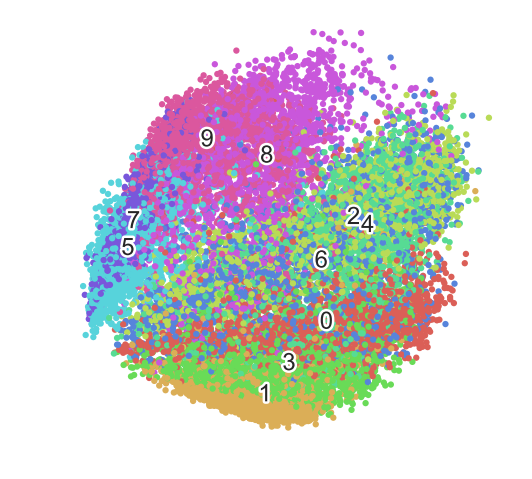

In [72]:
# Create scatter plot with PCA1 vs PCA2
fashion_scatter(pca_df[['pca1', 'pca2']].values, y_subset)

# Use t-SNE for Visualization

In [27]:
from sklearn.manifold import TSNE

In [28]:
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')

t-SNE done! Time elapsed: 992.7583675384521 seconds


No handles with labels found to put in legend.


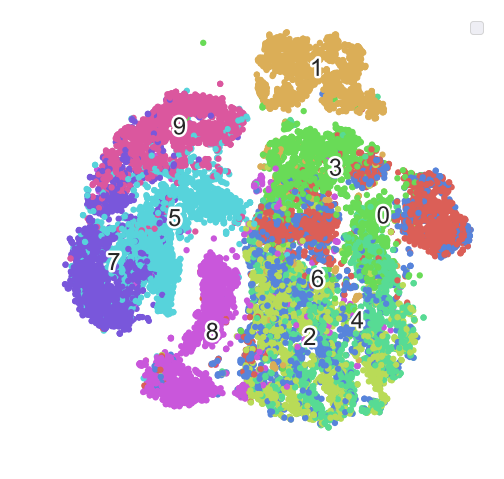

In [30]:
fashion_scatter(fashion_tsne, y_subset)
plt.legend()

# PCA then Use T-SNE

In [73]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print(f'PCA with 50 components done! Time elapsed: {time.time()-time_start} seconds')

print(f'Cumulative variance explained by 50 principal components: {np.sum(pca_50.explained_variance_ratio_)}')

PCA with 50 components done! Time elapsed: 1.2132625579833984 seconds
Cumulative variance explained by 50 principal components: 0.8625199479263013


In [76]:
time_start = time.time()
fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)
print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')

t-SNE done! Time elapsed: 317.53583335876465 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(5.80338,19.6414,'0'),
  Text(27.0359,58.2233,'1'),
  Text(19.0029,-41.5234,'2'),
  Text(49.8651,17.7339,'3'),
  Text(34.8563,-34.7429,'4'),
  Text(-36.6253,4.09699,'5'),
  Text(14.0119,-19.7255,'6'),
  Text(-61.3145,-15.0449,'7'),
  Text(-19.7028,-34.1263,'8'),
  Text(-39.3266,44.1235,'9')])

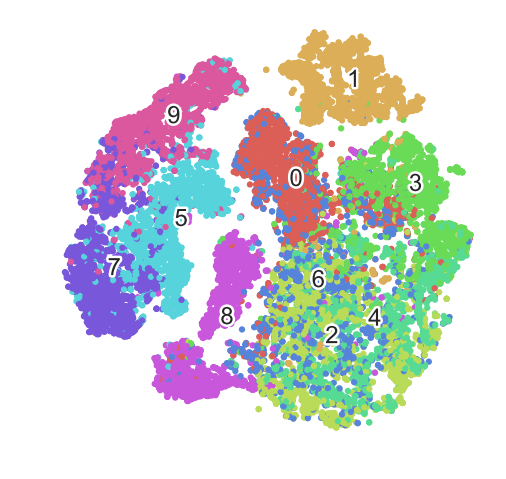

In [75]:
fashion_scatter(fashion_pca_tsne, y_subset)